# ✍️ MNIST 손글씨 데이터셋

### 📥 Import

In [108]:
import numpy as np
import pickle
import sys
import os

from PIL import Image
import matplotlib.pyplot as plt

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
print(f'현재 작업 디렉토리: "{os.getcwd()}"')

from common.functions import *
from dataset.mnist import load_mnist

현재 작업 디렉토리: "g:\zer0ken\ms-ai-school\neural-net\ch02 신경망"


### 🪧 공통 함수
- `get_data()`
  - 데이터셋에서 데이터를 불러옵니다.
- `init_network()`
  - 가중치 정보를 불러옵니다.
- `predict(network, x)`
  - `x`에 가중치, 활성함수 등을 순서대로 적용해서 계산한 y를 반환합니다.

In [113]:
def show_img(img, label=None):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label=label)
    plt.show()

In [112]:
def init_network():
    # 현재 디렉토리에서부터 가중치 파일까지의 상대 경로를 정확히 입력해야 합니다.
    weight_file = 'data/sample_weight.pkl'
    
    with open(weight_file, 'rb') as f:
        network = pickle.load(f)
        
    return network

In [91]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

### ❓예측해보기

In [144]:
import time

(_, _), (x, t) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
network = init_network()
accurate = 0
inaccurate = []

start = time.time()
for i in range(len(x)):
    y = predict(network, x[i])
    pred = np.argmax(y)
    
    if pred == t[i]:
        accurate += 1
    else:
        inaccurate.append((i, pred))
    
    if i < 5:
        print(f'#{i}: 예측 = {pred}, 실제 = {t[i]}')
time_diff = time.time() - start

print(f'...\n정확도: {accurate / len(x):.4f}, 실행 시간: {time_diff:.4f}초')

#0: 예측 = 7, 실제 = 7
#1: 예측 = 2, 실제 = 2
#2: 예측 = 1, 실제 = 1
#3: 예측 = 0, 실제 = 0
#4: 예측 = 4, 실제 = 4
...
정확도: 0.9352, 실행 시간: 0.1510초


### 📚 배치 단위로 예측해보기

In [ ]:
import time

(_, _), (x, t) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
network = init_network()
accurate = 0
inaccurate = []
batch_size = 100

start = time.time()
for batch, i in enumerate(range(0, len(x), batch_size)):
    y = predict(network, x[i:i+batch_size])
    pred = np.argmax(y, axis=1)
    batch_accurate = np.sum(pred == t[i:i+batch_size])
    
    accurate += batch_accurate
    inaccurate.extend(
        list(zip(
            map(int, np.arange(i, i + batch_size)[pred != t[i:i+batch_size]]),
            map(int, pred[pred != t[i:i+batch_size]])
        ))
    )
    
    if batch < 5:
        print(f'Batch {batch}: {batch_accurate} / {batch_size} accurate')

time_diff = time.time() - start

print(f'...\n정확도: {accurate / len(x):.4f}, 실행 시간: {time_diff:.4f}초')

Batch 0: 96 / 100 accurate
Batch 1: 98 / 100 accurate
Batch 2: 93 / 100 accurate
Batch 3: 90 / 100 accurate
Batch 4: 94 / 100 accurate
...
정확도: 0.9352, 실행 시간: 0.0174초


### 잘못 예측된 데이터

In [147]:
# 잘못 예측된 데이터의 인덱스와 예측 결과를 튜플로 묶어 저장한 리스트
inaccurate?

Type:        list
String form: [(8, 6), (33, 6), (66, 2), (92, 4), (124, 4), (149, 9), (217, 5), (233, 7), (241, 8), (245, 5), ( <...> 9905, 9), (9925, 2), (9940, 0), (9941, 6), (9943, 5), (9944, 9), (9970, 3), (9982, 2), (9986, 8)]
Length:      648
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.

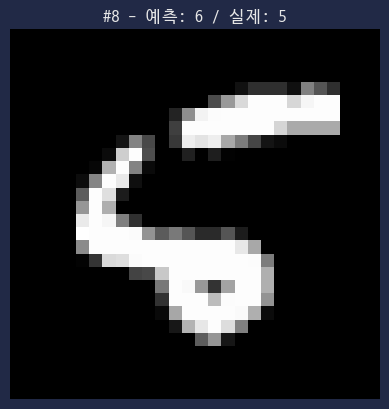

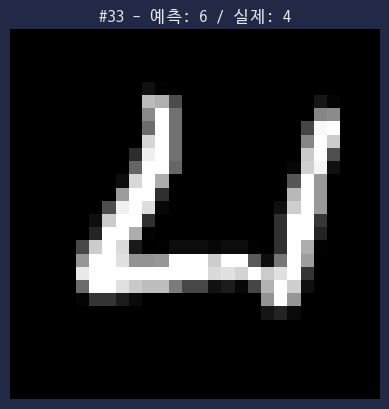

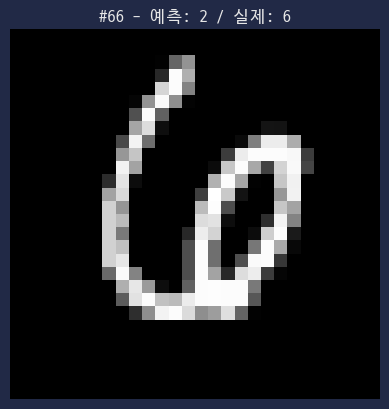

In [148]:
(_, _), (x, t) = load_mnist(flatten=False)
for i, pred in inaccurate[:3]:
    show_img(x[i], f'#{i} - 예측: {pred} / 실제: {t[i]}')